Alejandro Jesús González Santana

\begin{tabular}{rrr}
\toprule
Size & Threads & Streams \\
\midrule
2 & 31 & 10 \\
4 & 11 & 3 \\
8 & 7 & 2 \\
16 & 16 & 3 \\
32 & 12 & 4 \\
64 & 24 & 13 \\
128 & 43 & 76 \\
256 & 261 & 200 \\
512 & 1636 & 1385 \\
1024 & 20550 & 20086 \\
\bottomrule
\end{tabular}

Index(['Size', 'Threads', 'Streams'], dtype='object')


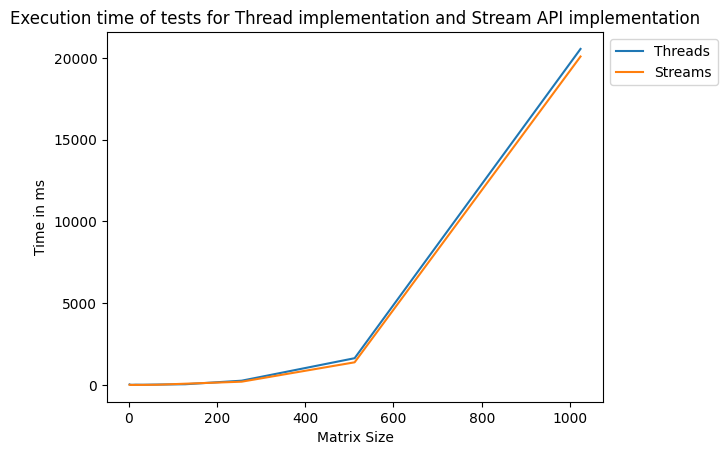

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data= pd.read_csv('DatosJunit.csv', sep=';')
print(data.to_latex(index=False))

ax = data.plot(kind='line', stacked=False, x='Size', legend=False)

print(data.columns)
ax.set_title(f'Execution time of tests for Thread implementation and Stream API implementation')
ax.set_xlabel('Matrix Size')
ax.set_ylabel('Time in ms')

ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.show()

mode
Sequential     813.100210
Threads       1737.727790
Streams          5.132035
dtype: float64


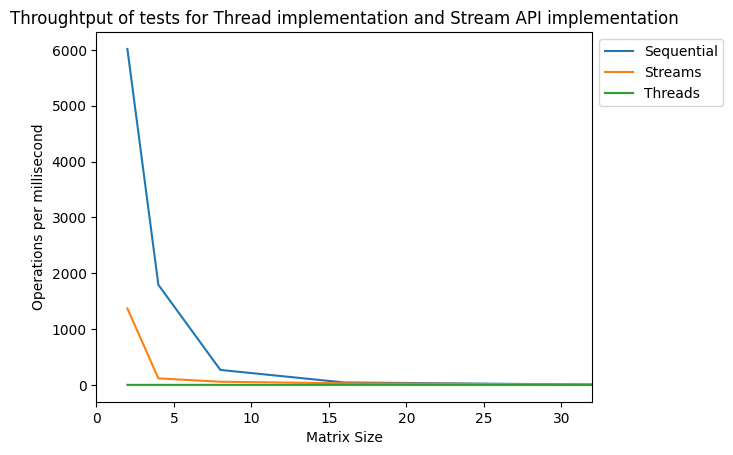

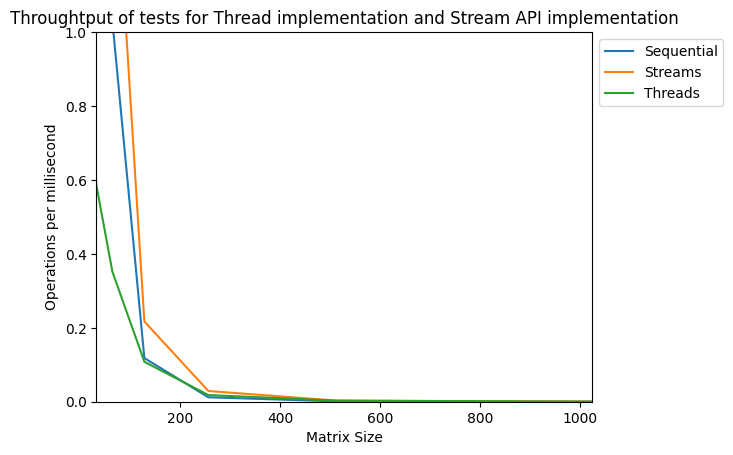

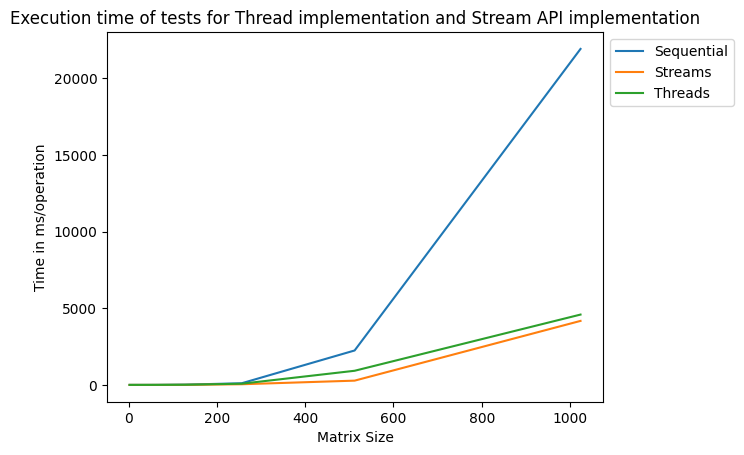

In [13]:
data_Avg = pd.read_csv('DatosAvg.csv', sep=';')
data_throughput = pd.read_csv('DatosThroughput.csv', sep=';')


#pivot in the column mode the data_Avg
data_Avg_pivot = data_Avg.pivot(index='size', columns='mode', values='time').reset_index()
data_throughput_pivot = data_throughput.pivot(index=data_throughput.columns[0], columns="mode", values="time").reset_index()

data_Avg_mean = data_Avg_pivot[['Sequential', 'Threads', 'Streams']].mean()

data_Avg_mean['Threads'] = data_Avg_mean['Sequential'] / data_Avg_mean['Threads']
data_Avg_mean['Streams'] = data_Avg_mean['Sequential'] / data_Avg_mean['Streams']



data_throughput_mean = data_throughput_pivot[['Sequential', 'Threads', 'Streams']].mean()

data_throughput_mean['Threads'] = data_throughput_mean['Sequential'] / data_throughput_mean['Threads']
data_throughput_mean['Streams'] = data_throughput_mean['Sequential'] / data_throughput_mean['Streams']
print(data_throughput_mean)

ax = data_throughput_pivot.plot(kind='line', stacked=False, x=data_throughput.columns[0], legend=False)
ax.set_title(f'Throughtput of tests for Thread implementation and Stream API implementation')
ax.set_xlabel('Matrix Size')
ax.set_ylabel('Operations per millisecond')
ax.set_xlim(0, 32)
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.show()

ax = data_throughput_pivot.plot(kind='line', stacked=False, x=data_throughput.columns[0], legend=False)


ax.set_title(f'Throughtput of tests for Thread implementation and Stream API implementation')
ax.set_xlabel('Matrix Size')
ax.set_ylabel('Operations per millisecond')
ax.set_xlim(32, 1024)
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
ax.set_ylim(0, 1)
plt.show()

ax = data_Avg_pivot.plot(kind='line', stacked=False, x='size', legend=False)


ax.set_title(f'Execution time of tests for Thread implementation and Stream API implementation')
ax.set_xlabel('Matrix Size')
ax.set_ylabel('Time in ms/operation')
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.show()